<a href="https://colab.research.google.com/github/BentheBurema/TM10007_ML_Project_group14/blob/main/Alicia_RFECV_differentkernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment Group 14 Dataset 2


## Importing libraries

In [31]:
# Basic packages
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

# Inspecting dataset
from scipy.stats import kstest

# Splitting dataset
from sklearn import model_selection

# Pre-processing
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing, model_selection, decomposition, svm, feature_selection
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from scipy.stats import skew, kurtosis, norm, kstest
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


In [2]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 4

## Data loading


In [3]:
# Data loading functions.
!git clone https://github.com/BentheBurema/TM10007_ML_Project_group14.git # ik snap niet waarom we dit doen? timo
from worcliver.load_data import load_data
data = load_data()

Cloning into 'TM10007_ML_Project_group14'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 153 (delta 69), reused 113 (delta 48), pack-reused 0
Receiving objects: 100% (153/153), 72.98 MiB | 30.03 MiB/s, done.
Resolving deltas: 100% (69/69), done.


## Inspecting data

In [5]:
# Finding the number of missing and incorrect values
print(f"Number of None types: {data.isnull().sum().sum()}")     # Count number of None types
print(f"Number of NaN values: {data.isna().sum().sum()}")       # Count number of NaN values
print(f'The number of samples: {len(data.index)}')              # print number of samples, features and feature names
print(f'The number of features: {len(data.columns)}')

# Check if the dataset is balanced
malignant = (data['label'] == 'malignant').sum()
print(f'The percentage of tumors that is malignant is {(malignant/len(data.index))*100}')

# Check if the data is normally distributed
Y = data['label']
X = data.drop('label', axis=1)

p_values = {}
for key,values in X.items():

  #perform Kolmogorov-Smirnov test on the values and store the p_values
  _, p_value = kstest(values, 'norm')
  # Store the p-value in the dictionary
  p_values[key] = p_value

# Print the p-values
#for key, p_value in p_values.items():
    #print(f"{key}: {p_value}")

# If p<0.05 is not normally distributed, if p>0.05 it is normally distributed
count_less_than_005 = sum(p_value < 0.05 for p_value in p_values.values())
count_greater_than_005 = sum(p_value > 0.05 for p_value in p_values.values())

print(f"Amount of featuers not normally distributed: {count_less_than_005}")
print(f"Amount of features normally distributed: {count_greater_than_005}")



Number of None types: 0
Number of NaN values: 0
The number of samples: 186
The number of features: 494
The percentage of tumors that is malignant is 50.53763440860215
Amount of featuers not normally distributed: 493
Amount of features normally distributed: 0


## Splitting dataset in training set and test set


In [6]:
Y = data['label']
X = data.drop('label', axis=1)

# Split the dataset in training and test part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
# Check if this is executed correctly
print("Amount samples in X_train (X_train):", X_train.shape[0])
print("Amount samples in X_test  (X_test):", X_test.shape[0])
print("Amount samples in Y_train (Y_train):", Y_train.shape[0])
print("Amount samples in Y_test (Y_test):", Y_test.shape[0])

display(X_train.head())

Amount samples in X_train (X_train): 148
Amount samples in X_test  (X_test): 38
Amount samples in Y_train (Y_train): 148
Amount samples in Y_test (Y_test): 38


,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
ID,,,,,,,,,,,,,,,,,,,,,
Liver-149_0,0.824583,0.055989,30.099345,4.415992,3.661071,1.861613,0.963279,0.022393,0.021571,0.011780,...,0.000000,0.104107,2.756906,8.453818,0.0,0,0.409805,222.558113,0.042636,11.809102
Liver-132_0,0.801146,0.092439,62.217271,5.375470,6.822246,2.509137,0.924549,0.049767,0.007751,0.002992,...,0.000000,0.100082,3.289330,11.458823,0.0,0,0.412003,2198.965478,0.000000,14.737962
Liver-018_0,0.784347,0.051682,29.057589,5.423131,8.776120,6.493751,0.967914,0.015269,0.035515,0.011933,...,0.015554,0.152348,1.301602,0.810392,0.0,0,0.526233,678.343564,0.211135,12.903202
Liver-135_0,0.762971,0.071214,39.719594,6.220513,8.349609,4.035151,0.944998,0.031507,0.028765,0.017286,...,0.000000,0.108344,1.929157,3.090863,0.0,0,0.391573,1168.726859,0.088960,14.316269
Liver-015_0,0.836579,0.075738,61.507831,7.303462,11.104662,3.733124,0.952526,0.027722,0.016664,0.011443,...,0.000000,0.078725,3.747019,15.215261,0.0,0,0.332604,1306.631943,0.000000,14.384808


## Preprocessing

### Outliers

In [12]:
# Checking on outliers using interquartile range
def define_outliers(feature):
  sorted_feature = np.sort(feature)
  Q1 = np.percentile(feature, 25)
  Q3 = np.percentile(feature, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
  outliers_total_column = (feature < lower_bound).sum() + (feature > upper_bound).sum()
  return outliers, outliers_total_column, lower_bound, upper_bound

# Performing the above functions on the train set
outliers_total = 0
for column in X_train.columns:
  outliers, outliers_total_column,_,_ = define_outliers(X_train[column])
  outliers_total += outliers_total_column
  #print(f'There are {outliers_total_column} outliers in {column}')
  #print(f'Outliers in column {column}: {outliers.tolist()}')
print(f'In total there are {outliers_total} outliers')


In total there are 3061 outliers


In [13]:
# Checking on outliers using range between 5 and 95%
# Ik snap niet waarom het nu meer outliers zijn ipv minder? Alicia
def define_outliers(feature):
  sorted_feature = np.sort(feature)
  lower_bound = np.percentile(feature, 5)
  upper_bound = np.percentile(feature, 95)
  outliers = feature[(feature < lower_bound) | (feature > upper_bound)]
  outliers_total_column = (feature < lower_bound).sum() + (feature > upper_bound).sum()
  return outliers, outliers_total_column, lower_bound, upper_bound

  # Performing the above functions on the train set
outliers_total = 0
for column in X_train.columns:
  outliers, outliers_total_column,_,_ = define_outliers(X_train[column])
  outliers_total += outliers_total_column
  #print(f'There are {outliers_total_column} outliers in {column}')
  #print(f'Outliers in column {column}: {outliers.tolist()}')
print(f'In total there are {outliers_total} outliers')

In total there are 7258 outliers


### RobustScaling



In [16]:
scaler = RobustScaler(quantile_range=(0.1, 0.9)).fit(X_train) # first and last 10% of samples are seen as outliers
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
display(X_train)

### Remove zero variance and ANOVA test

In [21]:
# Remove features with zero variance
vt = VarianceThreshold(threshold=0)
X_train_var = vt.fit_transform(X_train_scaled)
print(f'The data shape before removing zero variance: {X_train_scaled.shape} and after: {X_train_var.shape}')

# ANOVA feature selection for numeric input and categorical output
# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')
# apply feature selection
X_train_anova = fs.fit_transform(X_train_var, Y_train)
print(f'The data shape before ANOVA: {X_train_var.shape} and after ANOVA: {X_train_anova.shape}')

# Turn results back into a DataFrame
X_train = pd.DataFrame(X_train_anova)

The data shape before removing zero variance: (148, 493) and after: (148, 476)
The data shape before ANOVA: (148, 476) and after ANOVA: (148, 476)


### RFECV


RFECV(cv=10, estimator=SVC(kernel='linear'), scoring='accuracy', step=5)
Classes: ['benign' 'malignant']
Features seen during fit: 476
Optimal number of features: 96


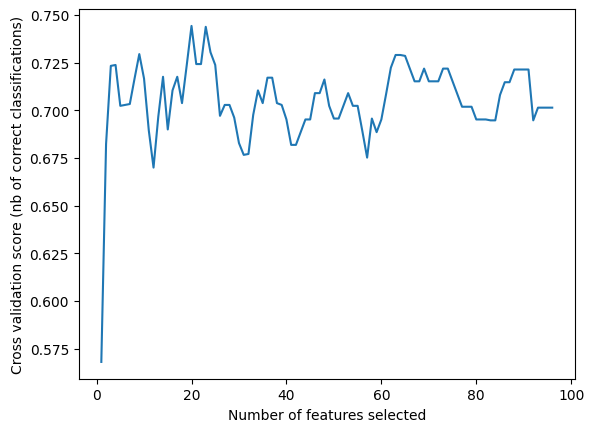

In [35]:
# Calculate optimal number of features
rfecv = RFECV(
    svm.SVC(kernel='linear'), cv=5, step=5, scoring='accuracy',
    min_features_to_select=8  # minimum number of features to consider
)

# Fit on train set
rfecv.fit(X_train, Y_train)

print(rfecv)
print(f"Classes: {rfecv.classes_}")
print(f"Features seen during fit: {rfecv.n_features_in_}")
print(f"Optimal number of features: {rfecv.n_features_}")

# Plot number of features VS. cross-validation scores
# Vreemd waarom bij n=41 juist de laagste cv-score is? Wat laat die figuur dan zien? Alicia
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [38]:
## RBF kernel
from sklearn.svm import SVC
# Initialize SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf')


# Calculate optimal number of features
rfecv = RFECV(
    svm.SVC(kernel='rbf'), cv=5, step=5, scoring='accuracy',
    min_features_to_select=8  # minimum number of features to consider
)

# Fit on train set
rfecv.fit(X_train, Y_train)

print(rfecv)
print(f"Classes: {rfecv.classes_}")
print(f"Features seen during fit: {rfecv.n_features_in_}")
print(f"Optimal number of features: {rfecv.n_features_}")

# Plot number of features VS. cross-validation scores
# Vreemd waarom bij n=41 juist de laagste cv-score is? Wat laat die figuur dan zien? Alicia
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()# Calculate optimal number of features
rfecv = RFECV(
    svm.SVC(kernel='rbf'), cv=5, step=5, scoring='accuracy',
    min_features_to_select=8  # minimum number of features to consider
)

# Fit on train set
rfecv.fit(X_train, Y_train)

print(rfecv)
print(f"Classes: {rfecv.classes_}")
print(f"Features seen during fit: {rfecv.n_features_in_}")
print(f"Optimal number of features: {rfecv.n_features_}")

# Plot number of features VS. cross-validation scores
# Vreemd waarom bij n=41 juist de laagste cv-score is? Wat laat die figuur dan zien? Alicia
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [34]:
## BENTHE
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import StratifiedKFold

# rfecv = RFECV(
#     estimator=LogisticRegression(max_iter=2000), # defining the maximum number of iterations
#     step=1,
#     cv=StratifiedKFold(5),    # How many folds for cross-validation
#     scoring="accuracy",       # Parameter to depend feature selection
#     min_features_to_select=1, # Minimum number of features to consider
#     n_jobs=2,
# )
# rfecv.fit(X_train_var, Y_train)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.cv_results_.grid_scores_) + 1), rfecv.cv_results_.grid_scores_)
# plt.show()